In [1]:
from torchvision.datasets import Cityscapes
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

image_size = (64, 128)
root_dir = "datasets/cityscapes"

input_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

target_transform = transforms.Compose([
    transforms.Resize(
        image_size,
        interpolation=transforms.InterpolationMode.NEAREST
    )
])


full_train_dataset = Cityscapes(
    root=root_dir,
    split='train',
    mode='fine',
    target_type='semantic',
    transform=input_transform,
    target_transform=target_transform,
)

full_val_dataset = Cityscapes(
    root=root_dir,
    split='val',
    mode='fine',
    target_type='semantic',
    transform=input_transform,
    target_transform=target_transform,
)

In [2]:
from utils.Cityscapes.CityscapesWrapper import CityscapesWrapper

train_samples = 800
val_samples = 200

train_subset = CityscapesWrapper(
    Subset(
        full_train_dataset,
        range(train_samples)
    ),
    target_transform=target_transform
)
val_subset = CityscapesWrapper(
    Subset(
        full_val_dataset,
        range(val_samples)
    ),
    target_transform=target_transform
)

train_loader = DataLoader(
    train_subset,
    batch_size=4,
    shuffle=True,
    num_workers=0
)
val_loader = DataLoader(
    val_subset,
    batch_size=4,
    shuffle=False,
    num_workers=0
)

In [3]:
from utils.Cityscapes.UNetTorchCityscapes import UNet
import torch.optim as optim
import torch.nn as nn

device = "mps"
model = UNet(
    in_channels=3,
    out_channels=34
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=1e-3
)

In [4]:
from utils.Cityscapes.CityscapesTrainingUtils import train_one_epoch_cityscapes, validate_cityscapes

train_losses = []
val_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    train_loss = train_one_epoch_cityscapes(model, train_loader, optimizer, criterion)
    val_loss = validate_cityscapes(model, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Epoch 1/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  3.93it/s]


Train Loss: 2.0271 | Val Loss: 1.2674

Epoch 2/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  3.92it/s]


Train Loss: 1.2209 | Val Loss: 1.1143

Epoch 3/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 1.0871 | Val Loss: 0.9762

Epoch 4/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]


Train Loss: 0.9970 | Val Loss: 0.9506

Epoch 5/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.9511 | Val Loss: 0.8914

Epoch 6/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.9248 | Val Loss: 0.8869

Epoch 7/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.8999 | Val Loss: 0.8520

Epoch 8/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.8758 | Val Loss: 0.8631

Epoch 9/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.8321 | Val Loss: 0.8460

Epoch 10/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.8149 | Val Loss: 0.7967

Epoch 11/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.7970 | Val Loss: 0.8462

Epoch 12/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.03it/s]


Train Loss: 0.7724 | Val Loss: 0.7609

Epoch 13/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.7595 | Val Loss: 0.7529

Epoch 14/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.7550 | Val Loss: 0.7449

Epoch 15/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.7296 | Val Loss: 0.7386

Epoch 16/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.7221 | Val Loss: 0.7293

Epoch 17/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.7087 | Val Loss: 0.7597

Epoch 18/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.6947 | Val Loss: 0.7164

Epoch 19/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.6735 | Val Loss: 0.7148

Epoch 20/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.6594 | Val Loss: 0.7141

Epoch 21/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.6521 | Val Loss: 0.7242

Epoch 22/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.6313 | Val Loss: 0.6878

Epoch 23/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.6242 | Val Loss: 0.6916

Epoch 24/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.6019 | Val Loss: 0.6931

Epoch 25/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.6024 | Val Loss: 0.6810

Epoch 26/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.5876 | Val Loss: 0.6608

Epoch 27/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.03it/s]


Train Loss: 0.5674 | Val Loss: 0.6493

Epoch 28/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.5569 | Val Loss: 0.6530

Epoch 29/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  3.96it/s]


Train Loss: 0.5370 | Val Loss: 0.6463

Epoch 30/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.5356 | Val Loss: 0.6573

Epoch 31/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.5113 | Val Loss: 0.6910

Epoch 32/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]


Train Loss: 0.4944 | Val Loss: 0.6676

Epoch 33/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.4839 | Val Loss: 0.6865

Epoch 34/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.5000 | Val Loss: 0.6980

Epoch 35/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.4656 | Val Loss: 0.7030

Epoch 36/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.4548 | Val Loss: 0.6873

Epoch 37/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.4398 | Val Loss: 0.6925

Epoch 38/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.4510 | Val Loss: 0.6918

Epoch 39/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.4393 | Val Loss: 0.6647

Epoch 40/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.4202 | Val Loss: 0.7350

Epoch 41/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.4134 | Val Loss: 0.7192

Epoch 42/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.4218 | Val Loss: 0.7402

Epoch 43/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.3853 | Val Loss: 0.6998

Epoch 44/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.3600 | Val Loss: 0.7367

Epoch 45/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.3614 | Val Loss: 0.6729

Epoch 46/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.3777 | Val Loss: 0.6971

Epoch 47/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.3926 | Val Loss: 0.7042

Epoch 48/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.3516 | Val Loss: 0.7351

Epoch 49/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.03it/s]


Train Loss: 0.3297 | Val Loss: 0.7869

Epoch 50/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.03it/s]


Train Loss: 0.3170 | Val Loss: 0.7527

Epoch 51/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.3050 | Val Loss: 0.7461

Epoch 52/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.3080 | Val Loss: 0.7349

Epoch 53/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.4208 | Val Loss: 0.6850

Epoch 54/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.3405 | Val Loss: 0.7149

Epoch 55/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.2877 | Val Loss: 0.7500

Epoch 56/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.2690 | Val Loss: 0.7642

Epoch 57/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.2580 | Val Loss: 0.7766

Epoch 58/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.2545 | Val Loss: 0.7956

Epoch 59/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.03it/s]


Train Loss: 0.2485 | Val Loss: 0.8131

Epoch 60/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.2450 | Val Loss: 0.8390

Epoch 61/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.2452 | Val Loss: 0.8269

Epoch 62/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.3217 | Val Loss: 0.7594

Epoch 63/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.3500 | Val Loss: 0.7718

Epoch 64/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.2812 | Val Loss: 0.7673

Epoch 65/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.2428 | Val Loss: 0.7904

Epoch 66/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.2199 | Val Loss: 0.8436

Epoch 67/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.2214 | Val Loss: 0.8816

Epoch 68/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.2045 | Val Loss: 0.8864

Epoch 69/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.2028 | Val Loss: 0.8534

Epoch 70/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.2003 | Val Loss: 0.8627

Epoch 71/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.3139 | Val Loss: 0.7673

Epoch 72/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.2966 | Val Loss: 0.7746

Epoch 73/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.2327 | Val Loss: 0.8404

Epoch 74/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.2026 | Val Loss: 0.9064

Epoch 75/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.1860 | Val Loss: 0.9300

Epoch 76/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.1807 | Val Loss: 0.9364

Epoch 77/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1759 | Val Loss: 0.9670

Epoch 78/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.1738 | Val Loss: 0.9830

Epoch 79/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1714 | Val Loss: 0.9312

Epoch 80/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.1742 | Val Loss: 0.9473

Epoch 81/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.1883 | Val Loss: 0.9366

Epoch 82/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.2962 | Val Loss: 0.7299

Epoch 83/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.3018 | Val Loss: 0.8086

Epoch 84/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.2119 | Val Loss: 0.8681

Epoch 85/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1760 | Val Loss: 0.9118

Epoch 86/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1620 | Val Loss: 0.9903

Epoch 87/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1525 | Val Loss: 0.9813

Epoch 88/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1540 | Val Loss: 1.0382

Epoch 89/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1583 | Val Loss: 0.9859

Epoch 90/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.1612 | Val Loss: 0.9999

Epoch 91/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1541 | Val Loss: 1.0049

Epoch 92/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.1505 | Val Loss: 1.0693

Epoch 93/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.1471 | Val Loss: 1.0617

Epoch 94/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.1512 | Val Loss: 0.9872

Epoch 95/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1602 | Val Loss: 0.9436

Epoch 96/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.01it/s]


Train Loss: 0.2760 | Val Loss: 0.7895

Epoch 97/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Train Loss: 0.3981 | Val Loss: 0.7589

Epoch 98/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.2325 | Val Loss: 0.8545

Epoch 99/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Train Loss: 0.1761 | Val Loss: 0.9168

Epoch 100/100


Validation: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]

Train Loss: 0.1515 | Val Loss: 0.9686


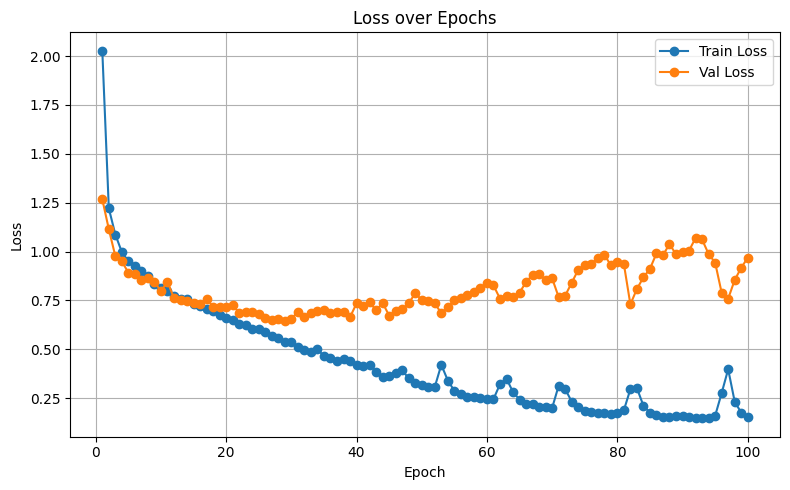

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

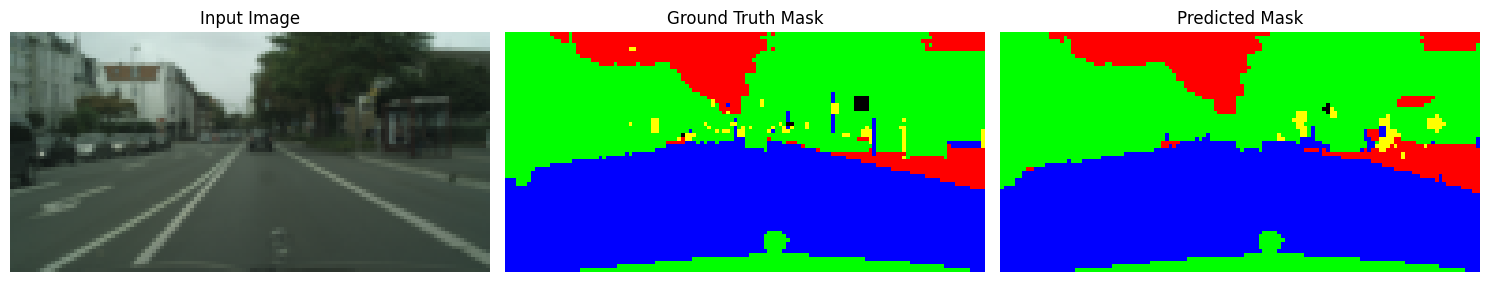

In [6]:
import numpy as np
import torch

model.eval()
with torch.no_grad():
    sample_image, sample_target = next(iter(val_loader))
    sample_image = sample_image.to(device)
    sample_target = sample_target.to(device)

    output = model(sample_image)
    pred_mask = torch.argmax(output, dim=1)

img = sample_image[0].cpu().permute(1, 2, 0).numpy()
gt_mask = sample_target[0].cpu().squeeze().numpy()
pred_mask = pred_mask[0].cpu().numpy()

def apply_colormap(mask):
    colormap = np.array([
        [0, 0, 0],         # class 0: black
        [0, 255, 0],       # class 1: green
        [0, 0, 255],       # class 2: blue
        [255, 0, 0],       # class 3: red
        [255, 255, 0],     # etc.
    ])
    mask_rgb = colormap[mask % len(colormap)]
    return mask_rgb.astype(np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("Input Image")
axs[1].imshow(apply_colormap(gt_mask))
axs[1].set_title("Ground Truth Mask")
axs[2].imshow(apply_colormap(pred_mask))
axs[2].set_title("Predicted Mask")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
torch.save(model.state_dict(), "./weights/cityscapes_unet.pth")

# Ensemble

In [8]:
num_classes = 34

model1 = UNet(in_channels=3, out_channels=num_classes).to(device)
model2 = UNet(in_channels=3, out_channels=num_classes).to(device)
model3 = UNet(in_channels=3, out_channels=num_classes).to(device)

ensemble_models = [model1, model2, model3]

In [9]:
optimizer1 = torch.optim.Adam(model1.parameters(), lr=1e-3)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=1e-3)

ensemble_optimizers = [optimizer1, optimizer2, optimizer3]

In [10]:
from tqdm import tqdm

def train_one_epoch_ensemble(models, optimizers, loader, criterion):
    for model in models:
        model.train()

    total_loss = 0

    for images, targets in tqdm(loader, desc="Training"):
        images = images.to(device)
        targets = targets.to(device).long().squeeze(1)

        batch_loss = 0

        for model, optimizer in zip(models, optimizers):
            outputs = model(images)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_loss += loss.item()

        total_loss += batch_loss / len(models)  # Average loss over ensemble

    return total_loss / len(loader)


def validate_ensemble(models, loader, criterion):
    for model in models:
        model.eval()

    total_loss = 0

    with torch.no_grad():
        for images, targets in loader:
            images = images.to(device)
            targets = targets.to(device).long().squeeze(1)

            outputs = [torch.softmax(model(images), dim=1) for model in models]
            avg_output = torch.stack(outputs).mean(dim=0)

            loss = criterion(avg_output, targets)
            total_loss += loss.item()

    return total_loss / len(loader)

In [11]:
num_epochs = 50
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    train_loss = train_one_epoch_ensemble(ensemble_models, ensemble_optimizers, train_loader, criterion)
    val_loss = validate_ensemble(ensemble_models, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Epoch 1/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.36it/s]


Train Loss: 2.1971 | Val Loss: 3.0860

Epoch 2/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 1.2101 | Val Loss: 3.0214

Epoch 3/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 1.0994 | Val Loss: 2.9823

Epoch 4/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 1.0348 | Val Loss: 3.0204

Epoch 5/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.9677 | Val Loss: 3.0036

Epoch 6/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.9281 | Val Loss: 2.9343

Epoch 7/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.8855 | Val Loss: 2.9010

Epoch 8/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.8585 | Val Loss: 2.9276

Epoch 9/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.8343 | Val Loss: 2.8927

Epoch 10/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.8052 | Val Loss: 2.8775

Epoch 11/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.7904 | Val Loss: 2.8915

Epoch 12/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.7695 | Val Loss: 2.8733

Epoch 13/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.7577 | Val Loss: 2.8702

Epoch 14/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.36it/s]


Train Loss: 0.7351 | Val Loss: 2.8712

Epoch 15/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.7271 | Val Loss: 2.8675

Epoch 16/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.6999 | Val Loss: 2.8468

Epoch 17/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.6903 | Val Loss: 2.8526

Epoch 18/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.36it/s]


Train Loss: 0.6719 | Val Loss: 2.8961

Epoch 19/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.6567 | Val Loss: 2.8386

Epoch 20/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.6381 | Val Loss: 2.8366

Epoch 21/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.36it/s]


Train Loss: 0.6254 | Val Loss: 2.8371

Epoch 22/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.6135 | Val Loss: 2.8333

Epoch 23/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.5956 | Val Loss: 2.8209

Epoch 24/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.5886 | Val Loss: 2.8229

Epoch 25/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.5725 | Val Loss: 2.8280

Epoch 26/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.5695 | Val Loss: 2.8257

Epoch 27/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.5465 | Val Loss: 2.8067

Epoch 28/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.5412 | Val Loss: 2.8240

Epoch 29/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.5268 | Val Loss: 2.8061

Epoch 30/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.36it/s]


Train Loss: 0.5101 | Val Loss: 2.8014

Epoch 31/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.36it/s]


Train Loss: 0.5215 | Val Loss: 2.8149

Epoch 32/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4996 | Val Loss: 2.8153

Epoch 33/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4717 | Val Loss: 2.8047

Epoch 34/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4617 | Val Loss: 2.7963

Epoch 35/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4506 | Val Loss: 2.8013

Epoch 36/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4496 | Val Loss: 2.7971

Epoch 37/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4466 | Val Loss: 2.8011

Epoch 38/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4442 | Val Loss: 2.7968

Epoch 39/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4281 | Val Loss: 2.7971

Epoch 40/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4141 | Val Loss: 2.7937

Epoch 41/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.4019 | Val Loss: 2.7943

Epoch 42/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3933 | Val Loss: 2.7858

Epoch 43/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3837 | Val Loss: 2.7954

Epoch 44/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3774 | Val Loss: 2.7789

Epoch 45/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3720 | Val Loss: 2.7897

Epoch 46/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3574 | Val Loss: 2.7856

Epoch 47/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3408 | Val Loss: 2.7829

Epoch 48/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3662 | Val Loss: 2.7936

Epoch 49/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3383 | Val Loss: 2.7763

Epoch 50/50


Training: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


Train Loss: 0.3193 | Val Loss: 2.7830


In [12]:
for i, model in enumerate(ensemble_models):
    torch.save(model.state_dict(), f"./weights/cityscapes_ensemble_unet_{i+1}.pth")

# Predicting masks for a normal sample, and for two samples that were adversarially attacked

/var/folders/b6/486jxbhd03z06w9634qqg4km0000gn/T/ipykernel_14871/1505048184.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  single_unet.load_state_dict(torch.load("./wei

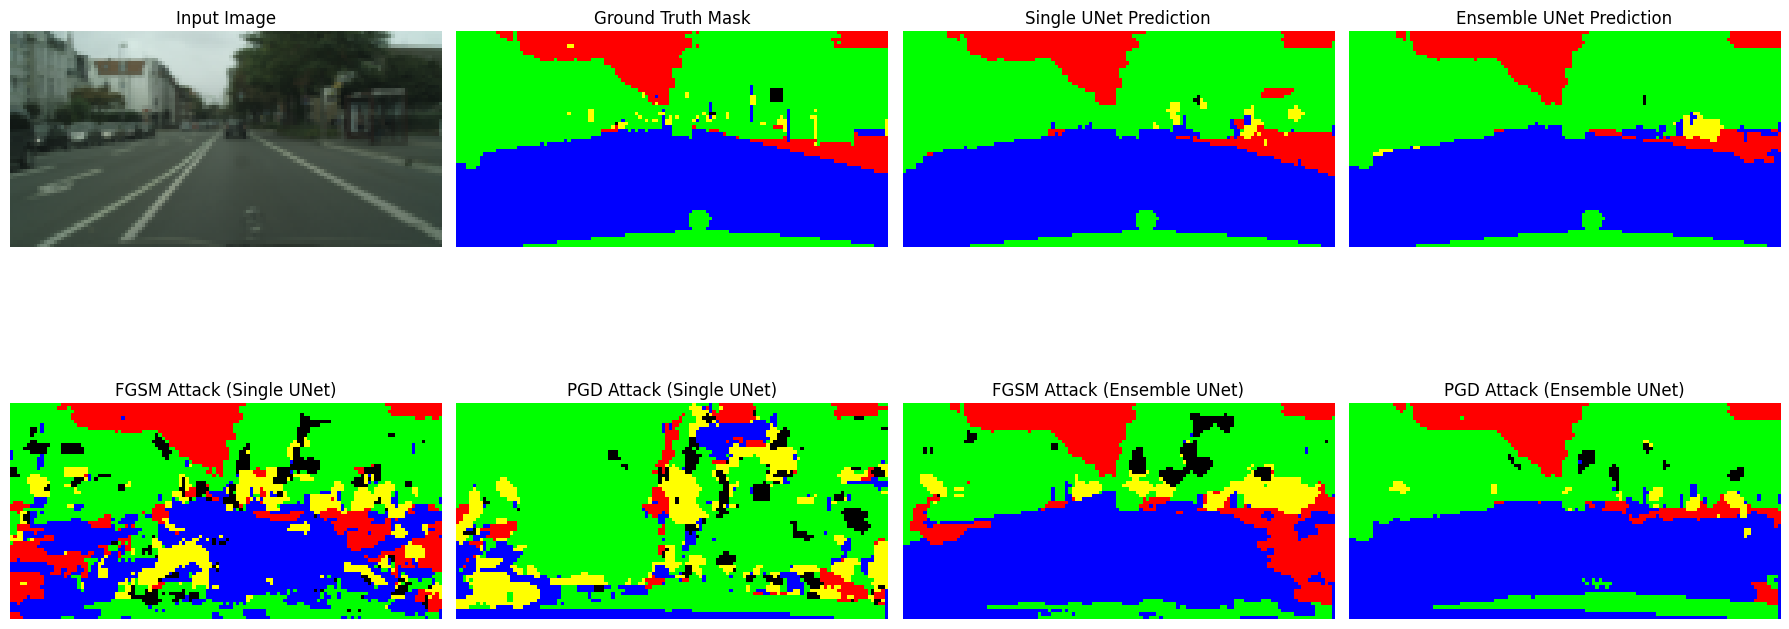

In [13]:
import torch
import torchattacks
import matplotlib.pyplot as plt
import numpy as np

single_unet = UNet(in_channels=3, out_channels=34)
single_unet.load_state_dict(torch.load("./weights/cityscapes_unet.pth"))
single_unet.to(device)
single_unet.eval()

ensemble_models = []
for i in range(3):
    ensemble_model = UNet(in_channels=3, out_channels=34)
    ensemble_model.load_state_dict(torch.load(f"./weights/cityscapes_ensemble_unet_{i+1}.pth"))
    ensemble_model.to(device)
    ensemble_model.eval()
    ensemble_models.append(ensemble_model)

def apply_colormap(mask):
    colormap = np.array([
        [0, 0, 0],         # class 0: black
        [0, 255, 0],       # class 1: green
        [0, 0, 255],       # class 2: blue
        [255, 0, 0],       # class 3: red
        [255, 255, 0],     # etc.
    ])
    mask_rgb = colormap[mask % len(colormap)]
    return mask_rgb.astype(np.uint8)

# Load a sample from the validation loader
sample_image, sample_target = next(iter(val_loader))
sample_image = sample_image.to(device)
sample_target = sample_target.to(device).long().squeeze(1)

with torch.no_grad():
    single_unet_output = single_unet(sample_image)
    single_unet_pred = torch.argmax(single_unet_output, dim=1)

ensemble_preds = [torch.softmax(m(sample_image), dim=1) for m in ensemble_models]
ensemble_avg_pred = torch.stack(ensemble_preds).mean(dim=0)
ensemble_pred = torch.argmax(ensemble_avg_pred, dim=1)

fgsm = torchattacks.FGSM(single_unet, eps=0.02)
pgd = torchattacks.PGD(single_unet, eps=0.02, alpha=0.01, steps=40)


sample_fgsm = fgsm(sample_image, sample_target)
sample_pgd = pgd(sample_image, sample_target)


with torch.no_grad():
    fgsm_single_output = single_unet(sample_fgsm)
    fgsm_single_pred = torch.argmax(fgsm_single_output, dim=1)

    pgd_single_output = single_unet(sample_pgd)
    pgd_single_pred = torch.argmax(pgd_single_output, dim=1)


fgsm_ensemble_preds = [torch.softmax(m(sample_fgsm), dim=1) for m in ensemble_models]
fgsm_ensemble_avg_pred = torch.stack(fgsm_ensemble_preds).mean(dim=0)
fgsm_ensemble_pred = torch.argmax(fgsm_ensemble_avg_pred, dim=1)

pgd_ensemble_preds = [torch.softmax(m(sample_pgd), dim=1) for m in ensemble_models]
pgd_ensemble_avg_pred = torch.stack(pgd_ensemble_preds).mean(dim=0)
pgd_ensemble_pred = torch.argmax(pgd_ensemble_avg_pred, dim=1)

img = sample_image[0].cpu().permute(1, 2, 0).numpy()
gt_mask = sample_target[0].cpu().squeeze().numpy()
single_unet_mask = single_unet_pred[0].cpu().numpy()
ensemble_mask = ensemble_pred[0].cpu().numpy()
fgsm_single_mask = fgsm_single_pred[0].cpu().numpy()
pgd_single_mask = pgd_single_pred[0].cpu().numpy()
fgsm_ensemble_mask = fgsm_ensemble_pred[0].cpu().numpy()
pgd_ensemble_mask = pgd_ensemble_pred[0].cpu().numpy()

fig, axs = plt.subplots(2, 4, figsize=(18, 9))

# Original Image
axs[0, 0].imshow(img)
axs[0, 0].set_title("Input Image")
axs[0, 0].axis('off')

# Ground Truth Mask
axs[0, 1].imshow(apply_colormap(gt_mask))
axs[0, 1].set_title("Ground Truth Mask")
axs[0, 1].axis('off')

# Mask with Single UNet
axs[0, 2].imshow(apply_colormap(single_unet_mask))
axs[0, 2].set_title("Single UNet Prediction")
axs[0, 2].axis('off')

# Mask with Ensemble UNet
axs[0, 3].imshow(apply_colormap(ensemble_mask))
axs[0, 3].set_title("Ensemble UNet Prediction")
axs[0, 3].axis('off')

# Mask with FGSM Attack and Single UNet
axs[1, 0].imshow(apply_colormap(fgsm_single_mask))
axs[1, 0].set_title("FGSM Attack (Single UNet)")
axs[1, 0].axis('off')

# Mask with PGD Attack and Single UNet
axs[1, 1].imshow(apply_colormap(pgd_single_mask))
axs[1, 1].set_title("PGD Attack (Single UNet)")
axs[1, 1].axis('off')

# Mask with FGSM Attack and Ensemble UNet
axs[1, 2].imshow(apply_colormap(fgsm_ensemble_mask))
axs[1, 2].set_title("FGSM Attack (Ensemble UNet)")
axs[1, 2].axis('off')

# Mask with PGD Attack and Ensemble UNet
axs[1, 3].imshow(apply_colormap(pgd_ensemble_mask))
axs[1, 3].set_title("PGD Attack (Ensemble UNet)")
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()